#### importado as lib para desenvolver o projeto


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sqlalchemy 
import dataframe_image as df1_image
import matplotlib.pyplot as plt

%matplotlib inline 

sns.set( color_codes=  True)
sns.set_palette( palette='magma', n_colors=True )


In [2]:
# ignorar os avisos 
import warnings  
warnings.filterwarnings('ignore')

**criando uma string de conexão ao banco de dados**

In [3]:
string_conetion = 'sqlite:///data/cardio.db'
conetion = sqlalchemy.create_engine( string_conetion, echo=True )

In [4]:
querys = pd.read_sql_query( 
    """
    SELECT * 
    
    FROM tb_cardio
    
    """, 
    conetion

)

2022-12-07 18:56:56,008 INFO sqlalchemy.engine.Engine 
    SELECT * 
    
    FROM tb_cardio
    
    
2022-12-07 18:56:56,009 INFO sqlalchemy.engine.Engine [raw sql] ()


data frame

In [5]:
df = pd.DataFrame(querys)
df

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,TM195,18,Male,14,Single,3,4,29562,112
1,1,TM195,19,Male,15,Single,2,3,31836,75
2,2,TM195,19,Female,14,Partnered,4,3,30699,66
3,3,TM195,19,Male,12,Single,3,3,32973,85
4,4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...,...
175,175,TM798,40,Male,21,Single,6,5,83416,200
176,176,TM798,42,Male,18,Single,5,4,89641,200
177,177,TM798,45,Male,16,Single,5,5,90886,160
178,178,TM798,47,Male,18,Partnered,4,5,104581,120


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          180 non-null    int64 
 1   Product        180 non-null    object
 2   Age            180 non-null    int64 
 3   Gender         180 non-null    object
 4   Education      180 non-null    int64 
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    int64 
 7   Fitness        180 non-null    int64 
 8   Income         180 non-null    int64 
 9   Miles          180 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 14.2+ KB


In [7]:
df.shape
print(f'É contido com 180 linhas e 10 colunas')

É contido com 180 linhas e 10 colunas


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,180.0,89.500000,52.105662,0.0,44.75,89.5,134.25,179.0
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [9]:
df1_image.export(df.describe().T, 'describe.png')

**Descrição do produto vendido**

In [10]:
df.describe(exclude="number").T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


Separando os produtos únicos do dataframe

In [11]:
df.Product.unique()
model_no_grp = df.groupby([df.Product])

minimo e maxímo

In [12]:
model_no_grp.min()

,index,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,,
TM195,0,18,Female,12,Partnered,2,1,29562,38
TM498,80,19,Female,12,Partnered,2,1,31836,21
TM798,140,22,Female,14,Partnered,3,3,48556,80


In [13]:
model_no_grp.max()

,index,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,,
TM195,79,50,Male,18,Single,5,5,68220,188
TM498,139,48,Male,18,Single,5,4,67083,212
TM798,179,48,Male,21,Single,7,5,104581,360


In [14]:
model_no_grp.std()

,index,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,,
TM195,23.237900,7.221452,1.216383,0.782624,0.664540,9075.783190,28.874102
TM498,17.464249,6.645248,1.222552,0.799717,0.629770,8653.989388,33.263135
TM798,11.690452,6.971738,1.639066,0.946993,0.667467,18505.836720,60.066544


**Análisando as relações entre as variávies númericas**

In [15]:
data_correlation = df.corr()
data_correlation


,index,Age,Education,Usage,Fitness,Income,Miles
index,1.000000,0.368723,0.533645,0.471248,0.526205,0.732982,0.510940
Age,0.368723,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.533645,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.471248,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.526205,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.732982,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.510940,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


Heatmap

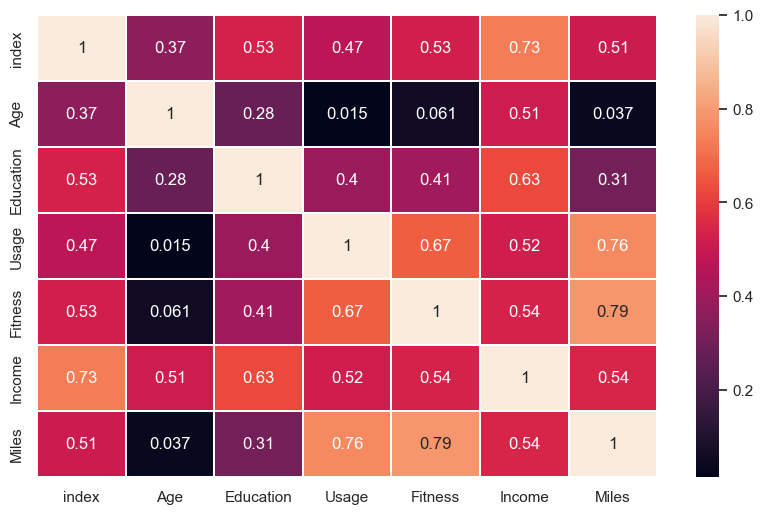

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data_correlation, annot=True , linewidths=0.2, linecolor='white');


Pairplot

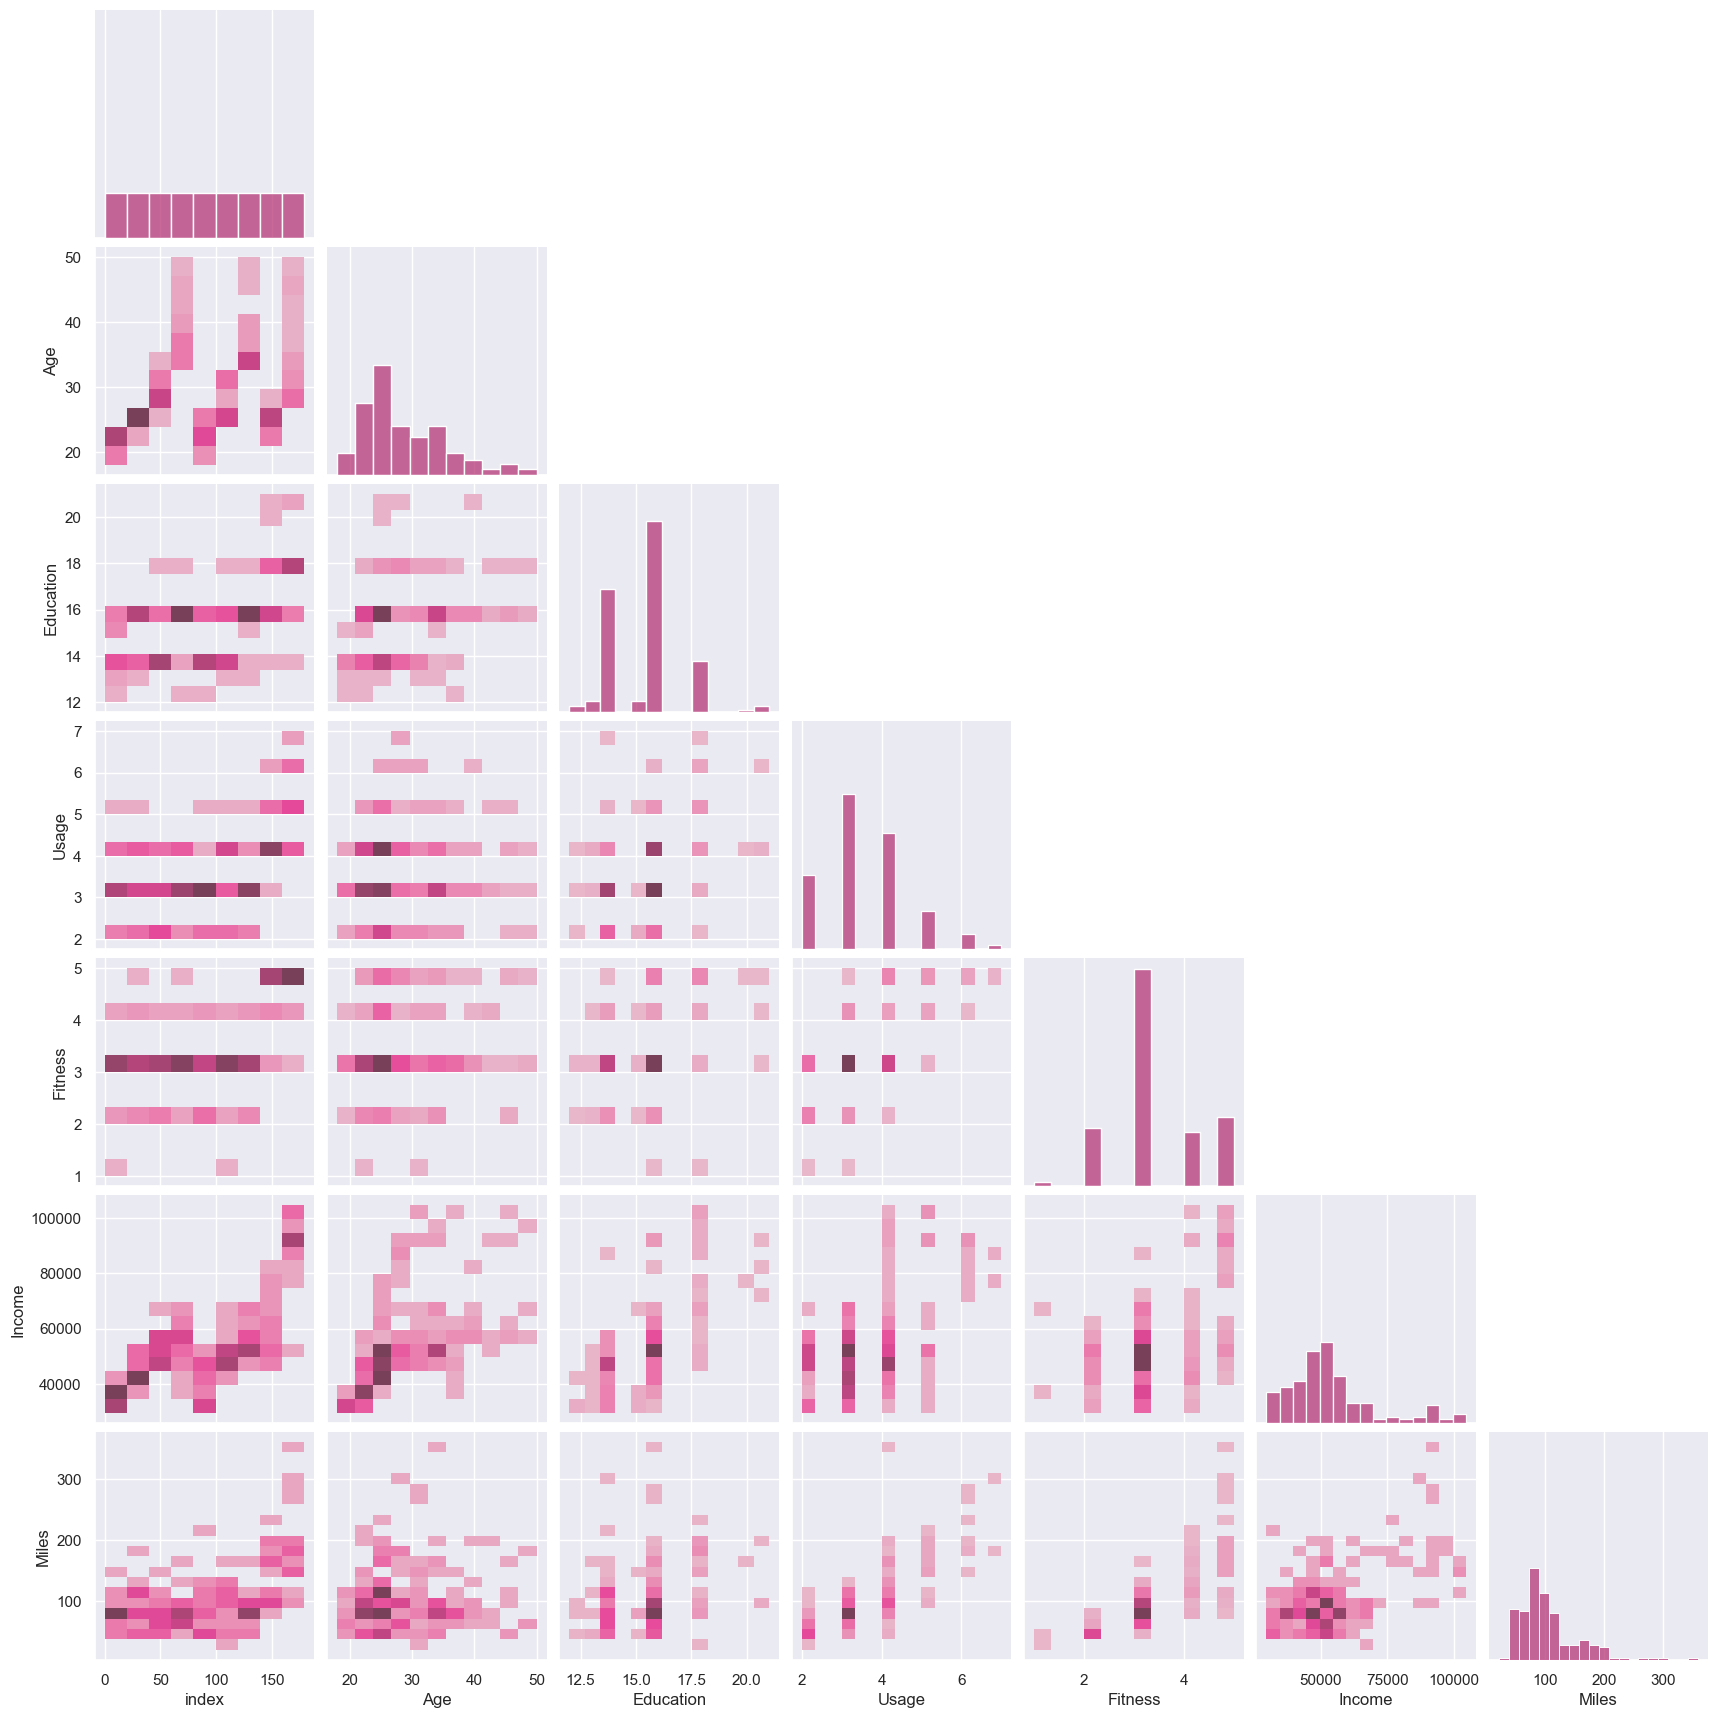

In [22]:
sns.pairplot(df, corner=True, kind="hist", palette='blue');

#### Análise univariada de dados categóricos

In [48]:

def bar_perc(plot, feature):
    total = len(feature)     
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)      
        x = p.get_x() + p.get_width() / 2 - 0.05        
        y = p.get_y() + p.get_height()                  
        ax.annotate(percentage, (x, y), size = 12)      

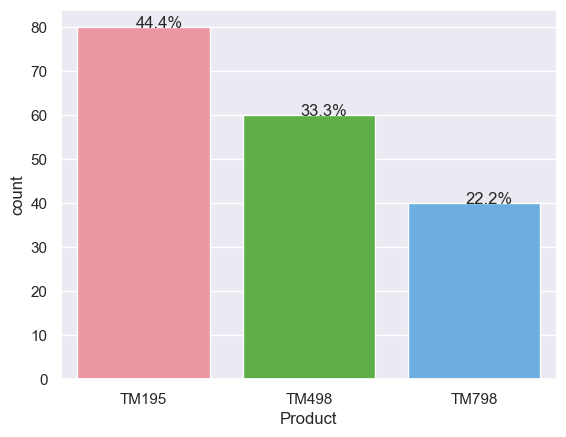

In [49]:
ax = sns.countplot(df, x='Product')     # creating a countplot and assigning that to a variable ax
bar_perc(ax, df['Product'])           # calling the method bar_perc and passing ax as the argument to get the percentages 

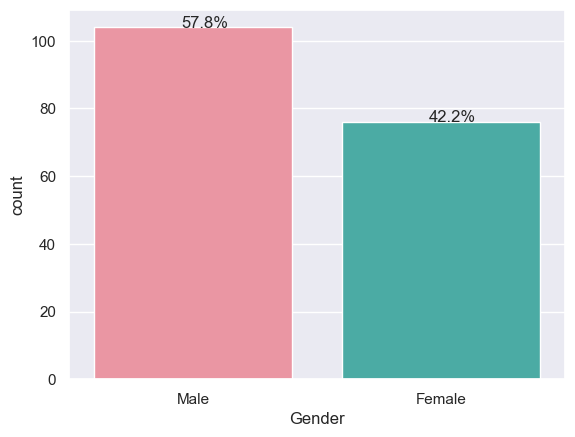

In [50]:
# gender 
ax =  sns.countplot(df, x='Gender')
bar_perc(ax, df['Gender'])

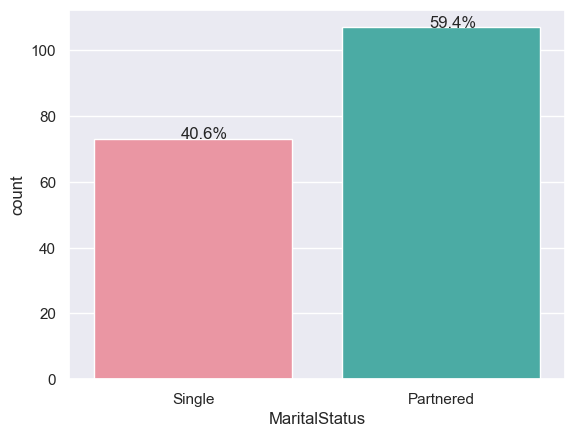

In [53]:
ax = sns.countplot(df, x='MaritalStatus')
bar_perc(ax, df['MaritalStatus'])

# Análise univariada de dados númericos

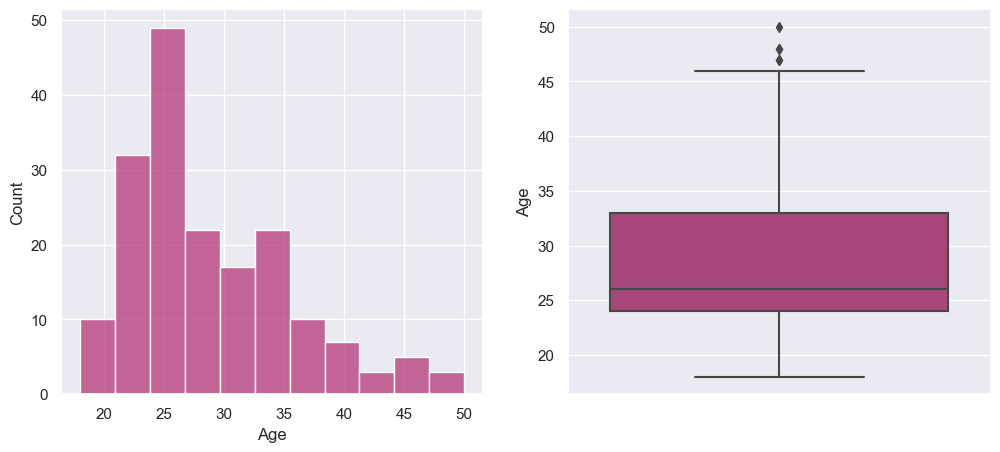

In [56]:
# age 

plt.figure(figsize=(12,5 ))
plt.subplot(1,2,1)
sns.histplot(df.Age)
plt.subplot(1,2,2)
sns.boxplot(y=df.Age)
plt.show()